# Products Scrapped Q-Q, Y-Y

## Problem Statement

Analyze and visualize the data of scrapped products in a warehouse over a specified period to identify patterns, trends, and key reasons for scrapping. There by optimizing inventory management, reducing waste, and improving overall operational efficiency.

### Data Collection/Description

**Data:** The Dataset gives the information about products scrapped over a period of time, which is created with dummy rows by considering few sample rows from t_tran_log.

**Data Dictionary:**
- Dataset contains 8 columns/features
- Dataset contains 299 records

**Description:**
- **transaction_code** - Code indicating the type of transaction (544 for Scrap).
- **transaction_name** - Name of the transaction type.
- **begin_transaction_date** - Date when the transaction began.
- **warehouse_id** - Identifier for the warehouse where the transaction took place.
- **sku_number** - Stock Keeping Unit number/Item number, unique for each product.
- **transaction_quantity** - Quantity of the product involved in the transaction. 
- **reason_id** - Reason code for the type of Scrap.
- **reason_description** - Description of the reason for scrapping.


### Importing required dependencies 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset

In [3]:
# Load the dataset
file_path = r"C:\Users\USER\Desktop\Products Scrapped Q-Q, Y-Y\Products Scrapped Q-Q, Y-Y.xlsx"
data = pd.read_excel(file_path)

#### Data Analysis

In [4]:
# Display the first few rows and basic information about the dataset
data.head()

,transaction_code,transaction_name,begin_transaction_date,warehouse_id,sku_number,transaction_quantity,reason_id,reason_description
0,544,Scrap,21-10-2024,850,FNRM00084,100,4,Defective
1,544,Scrap,20-08-2023,850,FNRM00074,100,1,Damaged
2,544,Scrap,28-10-2024,2,FNRM10386,100,4,Defective
3,544,Scrap,10-06-2023,1,FDRM10381,20,1,Damaged
4,544,Scrap,23-12-2023,2,FDRM10381,22,1,Damaged


In [5]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   transaction_code        299 non-null    int64 
 1   transaction_name        299 non-null    object
 2   begin_transaction_date  299 non-null    object
 3   warehouse_id            299 non-null    int64 
 4   sku_number              296 non-null    object
 5   transaction_quantity    299 non-null    int64 
 6   reason_id               299 non-null    int64 
 7   reason_description      299 non-null    object
dtypes: int64(4), object(4)
memory usage: 18.8+ KB


In [6]:
data.dtypes

transaction_code           int64
transaction_name          object
begin_transaction_date    object
warehouse_id               int64
sku_number                object
transaction_quantity       int64
reason_id                  int64
reason_description        object
dtype: object

In [7]:
# Convert 'begin_transaction_date' to datetime format and extract year, month, quarter
data['begin_transaction_date'] = pd.to_datetime(data['begin_transaction_date'], format='%d-%m-%Y')
data['year'] = data['begin_transaction_date'].dt.year
data['month'] = data['begin_transaction_date'].dt.month
data['quarter'] = data['begin_transaction_date'].dt.to_period('Q')

In [8]:
data

,transaction_code,transaction_name,begin_transaction_date,warehouse_id,sku_number,transaction_quantity,reason_id,reason_description,year,month,quarter
0,544,Scrap,2024-10-21,850,FNRM00084,100,4,Defective,2024,10,2024Q4
1,544,Scrap,2023-08-20,850,FNRM00074,100,1,Damaged,2023,8,2023Q3
2,544,Scrap,2024-10-28,2,FNRM10386,100,4,Defective,2024,10,2024Q4
3,544,Scrap,2023-06-10,1,FDRM10381,20,1,Damaged,2023,6,2023Q2
4,544,Scrap,2023-12-23,2,FDRM10381,22,1,Damaged,2023,12,2023Q4
...,...,...,...,...,...,...,...,...,...,...,...
294,544,Scrap,2024-09-19,850,50000397,41,2,Quality Control,2024,9,2024Q3
295,544,Scrap,2023-12-02,1,50000397,10,1,Damaged,2023,12,2023Q4
296,544,Scrap,2024-05-16,2,50000398,3,3,Expired,2024,5,2024Q2
297,544,Scrap,2024-10-29,850,50000398,10,3,Expired,2024,10,2024Q4


#### Total quantity Scrapped for each unique sku_number

In [9]:
# Unique sku_numbers and their total scrapped quantities
unique_skus = data['sku_number'].nunique()
total_quantity_by_sku = data.groupby('sku_number')['transaction_quantity'].sum().reset_index().sort_values(by='transaction_quantity', ascending=False)
total_quantity_by_sku

,sku_number,transaction_quantity
36,FDRM10381,835
35,FDFGBOM03,556
7,50000238,323
28,50065023,298
38,FNFG00000,298
9,50000243,268
48,NNFG00000,247
43,FNRM10386,247
44,FNRMBOM74,232
15,50002015,224


#### Total Quantity of products Scrapped in each year for each sku_number 

In [10]:
# Total Products Scrapped in Each Year for Each sku_number
total_scrapped_per_year = data.groupby(['sku_number', 'year'])['transaction_quantity'].sum().reset_index().sort_values(by='transaction_quantity', ascending=False)

# Pivot the data to compare 2023 and 2024
comparison_2023_2024 = total_scrapped_per_year.pivot(index='sku_number', columns='year', values='transaction_quantity').fillna(0)
comparison_2023_2024.columns = ['Quantity in 2023', 'Quantity in 2024']

# Reset index to make 'sku_number' a column
comparison_2023_2024.reset_index(inplace=True)

# Convert the quantities to integers
comparison_2023_2024['Quantity in 2023'] = comparison_2023_2024['Quantity in 2023'].astype(int)
comparison_2023_2024['Quantity in 2024'] = comparison_2023_2024['Quantity in 2024'].astype(int)

# Display the result
comparison_2023_2024

,sku_number,Quantity in 2023,Quantity in 2024
0,50000057,74,8
1,50000061,69,111
2,50000062,30,77
3,50000073,105,112
4,50000074,0,44
5,50000081,126,36
6,50000088,2,60
7,50000238,80,243
8,50000242,40,0
9,50000243,127,141


   sku_number              Year  Quantity
0    50000057  Quantity in 2023        74
1    50000061  Quantity in 2023        69
2    50000062  Quantity in 2023        30
3    50000073  Quantity in 2023       105
4    50000074  Quantity in 2023         0
..        ...               ...       ...
95   KEER1001  Quantity in 2024        50
96   KEER2002  Quantity in 2024         0
97    KEER222  Quantity in 2024        15
98  NNFG00000  Quantity in 2024       127
99  TNFG00000  Quantity in 2024         0

[100 rows x 3 columns]


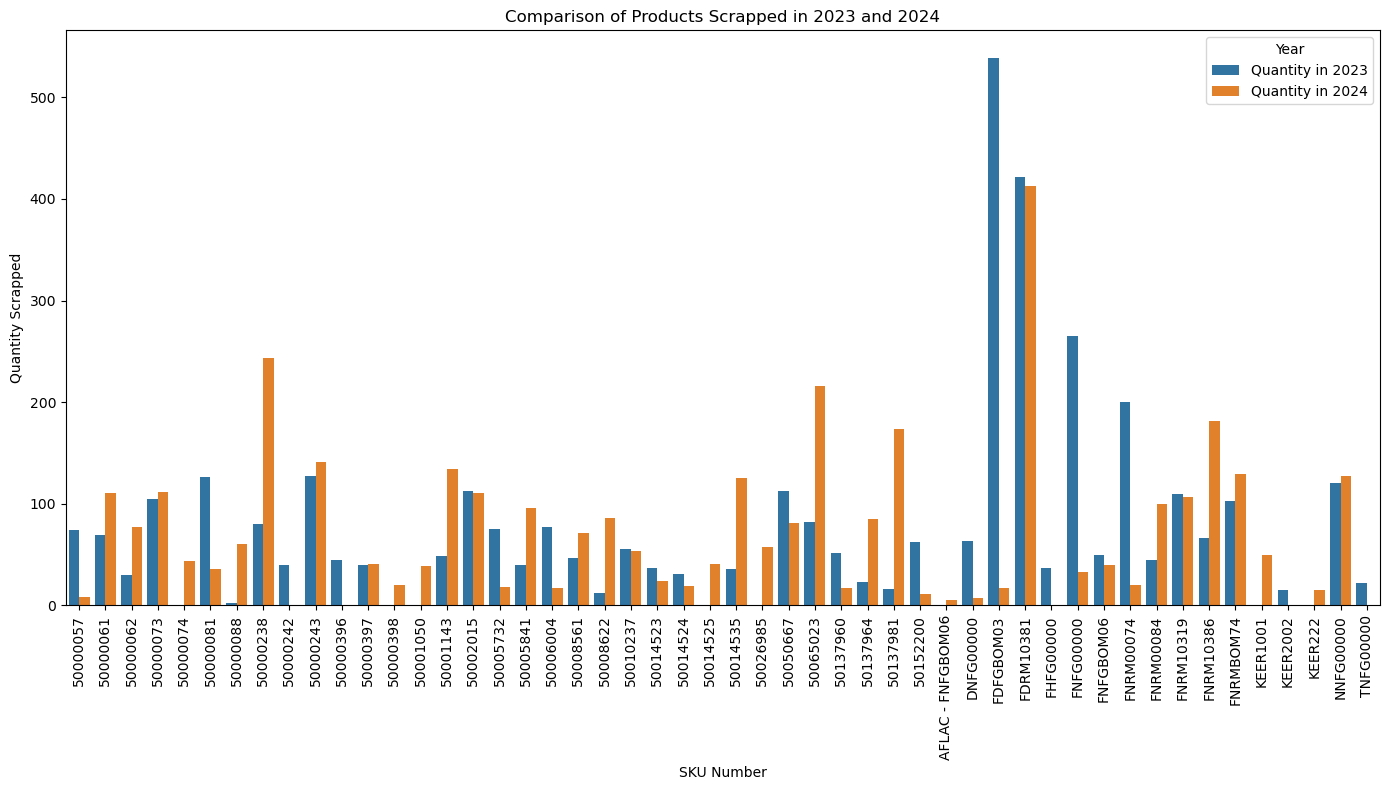

In [11]:
# Melt the dataframe for better visualization with seaborn
comparison = pd.melt(comparison_2023_2024, id_vars=['sku_number'], value_vars=['Quantity in 2023', 'Quantity in 2024'],
                            var_name='Year', value_name='Quantity')
print(comparison)
# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=comparison, x='sku_number', y='Quantity', hue='Year')
plt.title('Comparison of Products Scrapped in 2023 and 2024')
plt.xlabel('SKU Number')
plt.ylabel('Quantity Scrapped')
plt.xticks(rotation=90)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

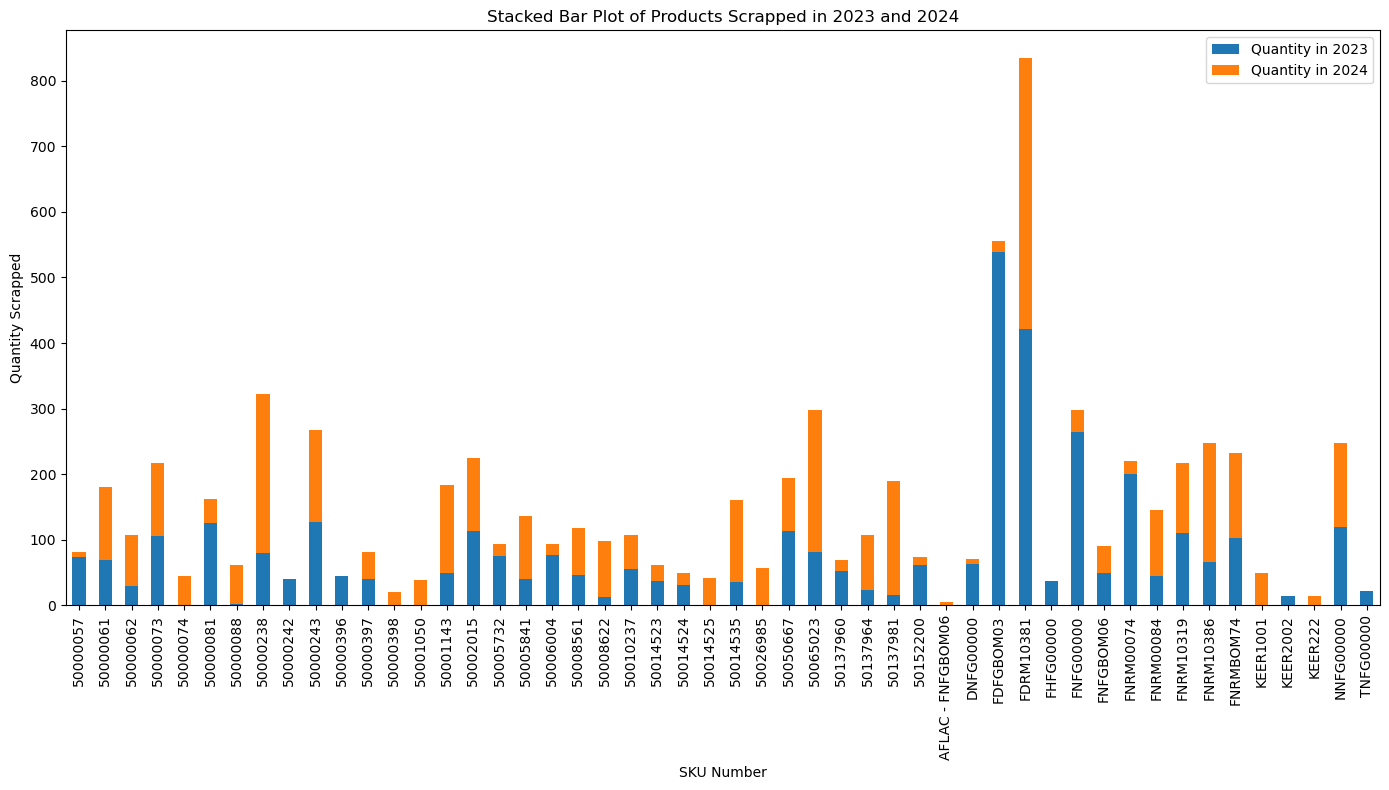

In [12]:
# Create a stacked bar plot
comparison_2023_2024.set_index('sku_number')[['Quantity in 2023', 'Quantity in 2024']].plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Stacked Bar Plot of Products Scrapped in 2023 and 2024')
plt.xlabel('SKU Number')
plt.ylabel('Quantity Scrapped')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Count of Number of times products Scrapped for each reason 

In [14]:
# Frequent scrapping reasons
reason_counts = data['reason_description'].value_counts().reset_index()
reason_counts.columns = ['reason_description', 'count']
reason_counts

,reason_description,count
0,Damaged,85
1,Expired,81
2,Defective,69
3,Quality Control,64


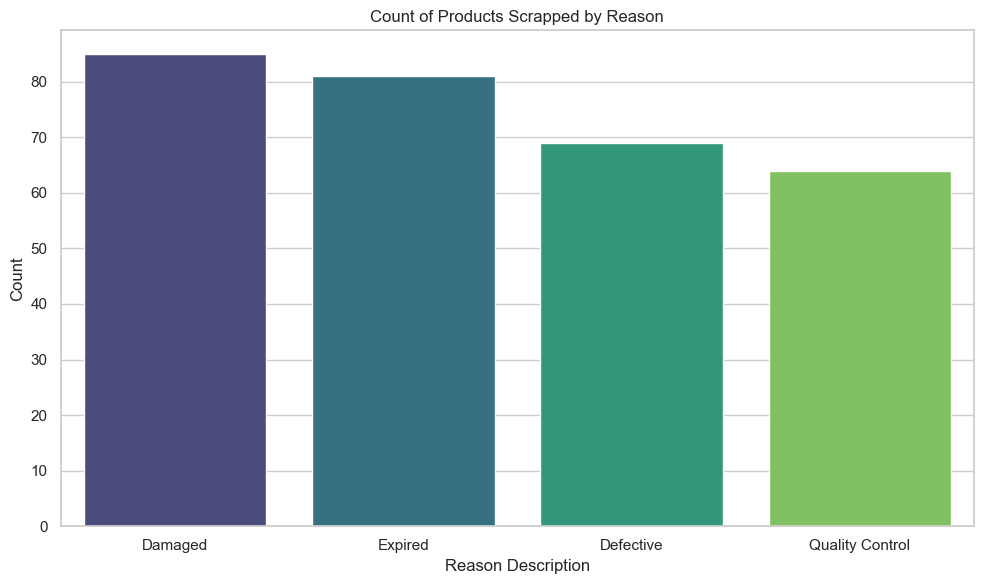

In [16]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=reason_counts, x='reason_description', y='count', palette='viridis')
plt.title('Count of Products Scrapped by Reason')
plt.xlabel('Reason Description')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.show()

#### Total quantity of products scrapped for each reason

In [17]:
# Scrapped products by reason
scrapped_by_reason = data.groupby('reason_description')['transaction_quantity'].sum().reset_index()
scrapped_by_reason

,reason_description,transaction_quantity
0,Damaged,2201
1,Defective,1658
2,Expired,2319
3,Quality Control,1195


#### Total Quantity of each products scrapped in each warehouse 

In [18]:
# Total Products Scrapped in Each Warehouse for Each sku_number
total_scrapped_per_warehouse = data.groupby(['warehouse_id', 'sku_number'])['transaction_quantity'].sum().reset_index().sort_values(by='transaction_quantity', ascending=False)
total_scrapped_per_warehouse

,warehouse_id,sku_number,transaction_quantity
27,1,FDFGBOM03,442
102,850,FDRM10381,402
67,2,FDRM10381,355
30,1,FNFG00000,262
69,2,FNRM10386,197
...,...,...,...
112,850,TNFG00000,3
97,850,50137960,2
10,1,50005732,2
86,850,50001050,2


#### Quarter to Quarter Analysis

In [19]:
# Aggregate data on a quarterly basis
quarterly_data = data.groupby(['year', 'quarter', 'sku_number', 'reason_description']).agg(
    total_quantity=('transaction_quantity', 'sum'),
    count=('transaction_quantity', 'size')
).reset_index()
quarterly_data

,year,quarter,sku_number,reason_description,total_quantity,count
0,2023,2023Q1,50000057,Quality Control,1,1
1,2023,2023Q1,50000062,Damaged,23,2
2,2023,2023Q1,50000073,Defective,2,1
3,2023,2023Q1,50000073,Expired,13,1
4,2023,2023Q1,50000081,Expired,91,1
...,...,...,...,...,...,...
250,2024,2024Q4,FNRM10319,Damaged,50,1
251,2024,2024Q4,FNRM10386,Defective,100,1
252,2024,2024Q4,FNRMBOM74,Defective,17,1
253,2024,2024Q4,FNRMBOM74,Expired,5,1


C:\Users\USER\AppData\Local\Temp\ipykernel_11012\1106627969.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=quarterly_data, x='quarter', y='total_quantity', estimator=sum, ci=None)


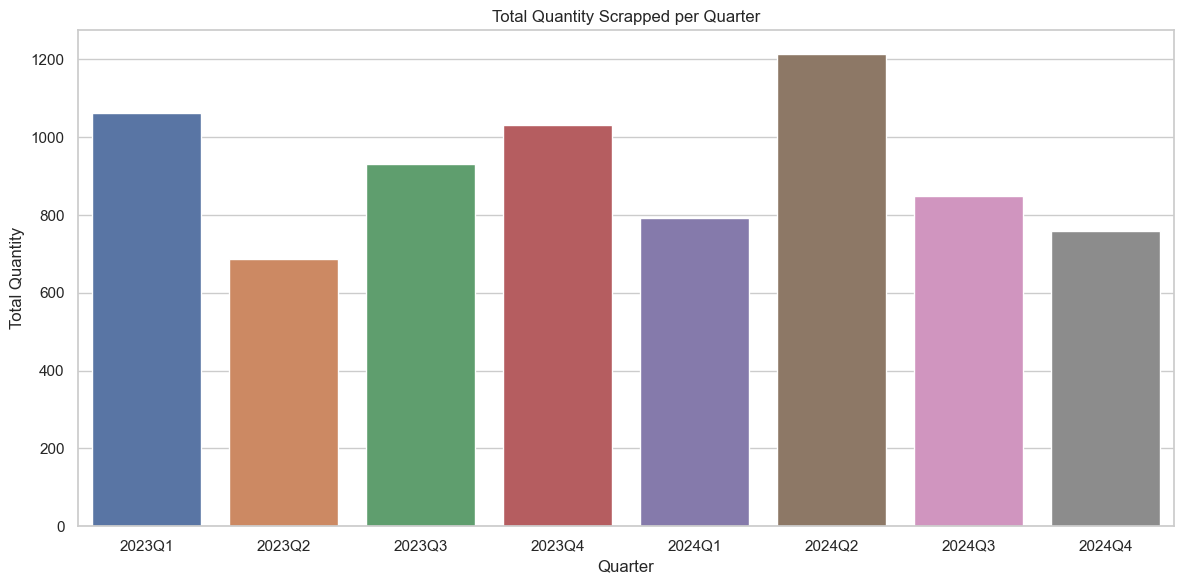

In [21]:
# Set up the visualisation style
sns.set(style="whitegrid")
# Total quantity scrapped per quarter
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_data, x='quarter', y='total_quantity', estimator=sum, ci=None)
plt.title('Total Quantity Scrapped per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity')
plt.xticks()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11012\1348741166.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=quarterly_data, x='quarter', y='total_quantity', hue='reason_description', estimator=sum, ci=None)


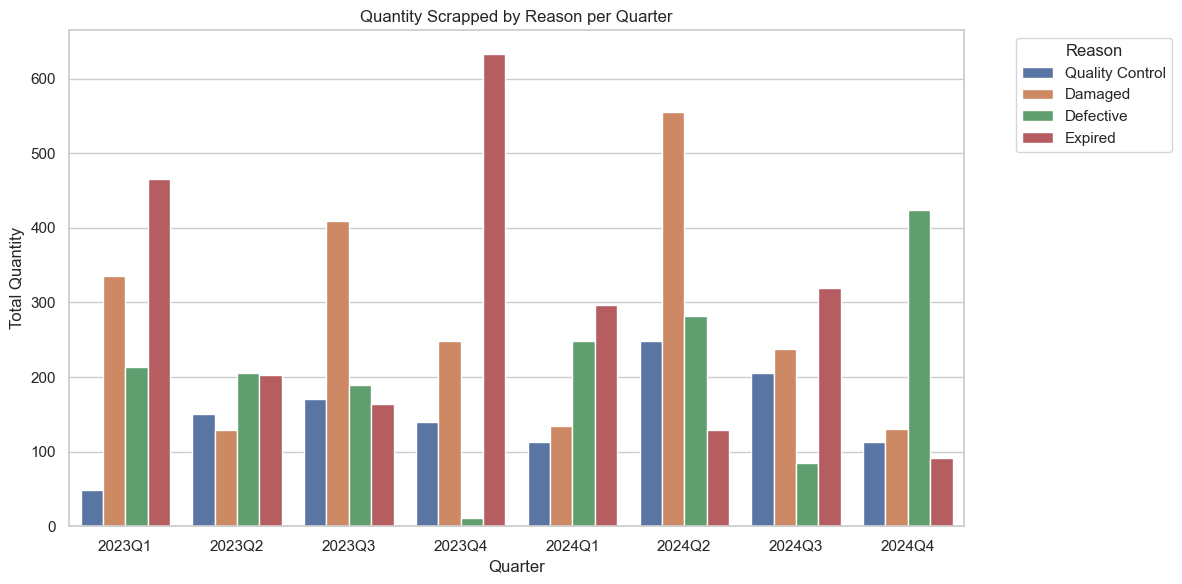

In [22]:
# Set up the visualisation style
sns.set(style="whitegrid")
# Quantity scrapped by reason per quarter
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_data, x='quarter', y='total_quantity', hue='reason_description', estimator=sum, ci=None)
plt.title('Quantity Scrapped by Reason per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity')
plt.xticks()
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Month to Month Analysis

In [90]:
# Aggregate data on a monthly basis
monthly_data = data.groupby(['year', 'month', 'sku_number', 'reason_description']).agg(
    total_quantity=('transaction_quantity', 'sum'),
    count=('transaction_quantity', 'size')
).reset_index()
monthly_data

,year,month,sku_number,reason_description,total_quantity,count
0,2023,1,50000081,Quality Control,7,1
1,2023,1,50000238,Expired,16,1
2,2023,1,50000243,Defective,18,1
3,2023,1,50000243,Quality Control,3,1
4,2023,1,50000396,Defective,19,1
...,...,...,...,...,...,...
279,2024,12,50008622,Quality Control,5,1
280,2024,12,50014523,Quality Control,2,1
281,2024,12,50152200,Quality Control,6,1
282,2024,12,FDFGBOM03,Damaged,2,1


C:\Users\USER\AppData\Local\Temp\ipykernel_3464\1910102036.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=monthly_data, x='month', y='total_quantity', hue = 'year', estimator=sum, ci=None)


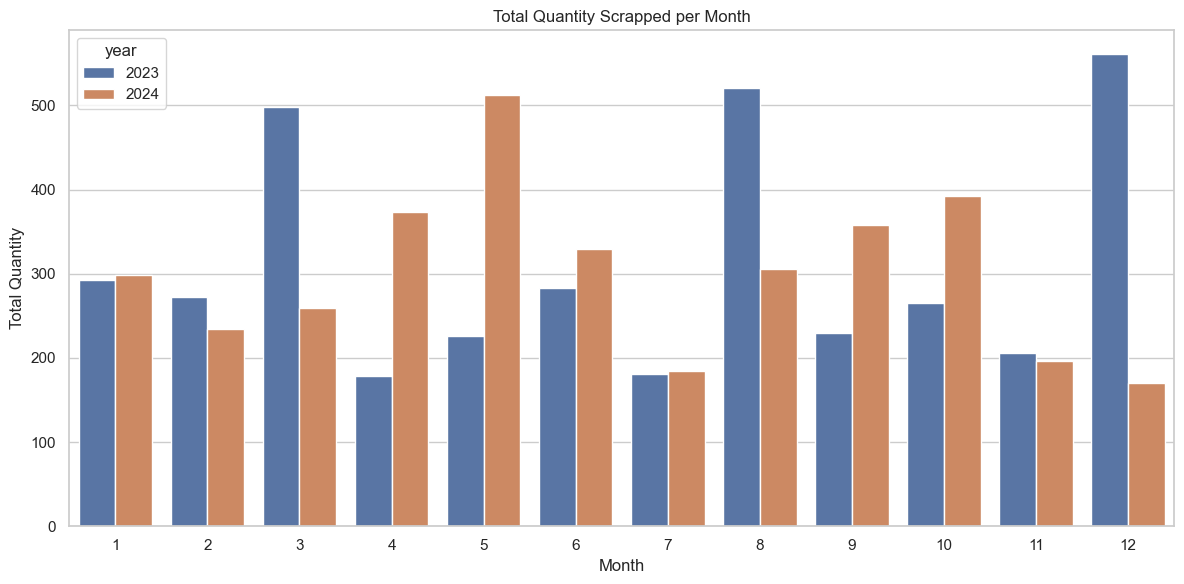

In [93]:
# Set up the visualisation style
sns.set(style="whitegrid")
# Total quantity scrapped per month
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='month', y='total_quantity', hue = 'year', estimator=sum, ci=None)
plt.title('Total Quantity Scrapped per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_3464\2950653248.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=monthly_data, x='month', y='total_quantity', hue='reason_description', estimator=sum, ci=None)


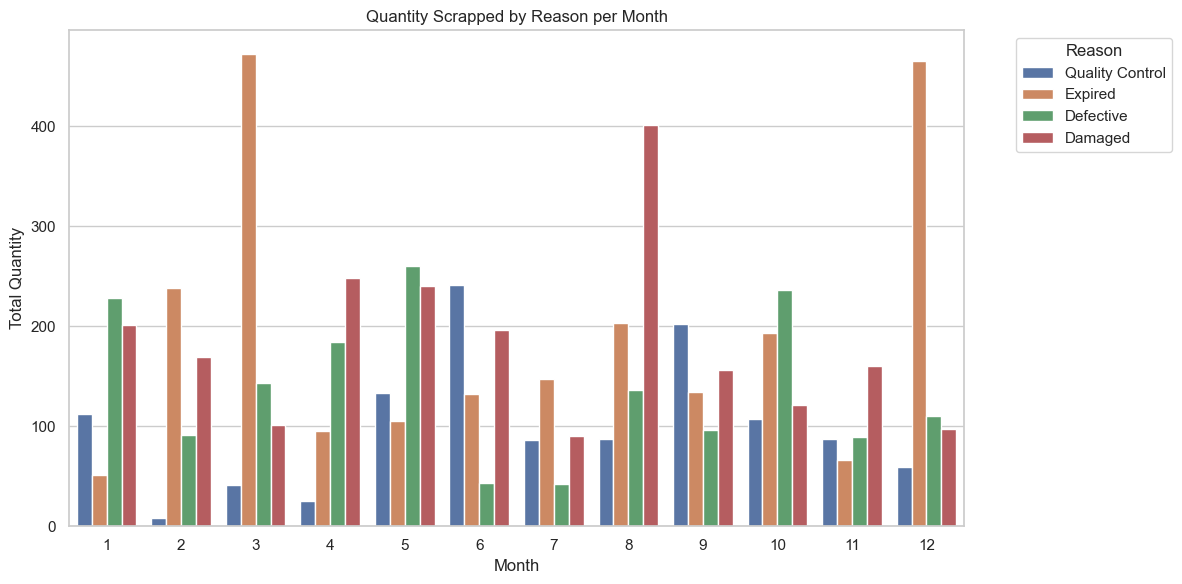

In [96]:
# Set up the visualisation style
sns.set(style="whitegrid")
# Quantity scrapped by reason per quarter
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='month', y='total_quantity', hue='reason_description', estimator=sum, ci=None)
plt.title('Quantity Scrapped by Reason per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks()
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Total Quantity each products Scrapped in each year

In [97]:
# Total Quantity Scrapped of Each Product in Each Year
total_scrapped_per_year = data.groupby(['sku_number', 'year'])['transaction_quantity'].sum().reset_index()
print(total_scrapped_per_year)

   sku_number  year  transaction_quantity
0    50000057  2023                    74
1    50000057  2024                     8
2    50000061  2023                    69
3    50000061  2024                   111
4    50000062  2023                    30
..        ...   ...                   ...
82   KEER2002  2023                    15
83    KEER222  2024                    15
84  NNFG00000  2023                   120
85  NNFG00000  2024                   127
86  TNFG00000  2023                    22

[87 rows x 3 columns]


#### Total Quantity each products Scrapped in each month

In [98]:
# Total Quantity Scrapped of Each Product in Each Month
total_scrapped_per_month = data.groupby(['sku_number', 'year', 'month'])['transaction_quantity'].sum().reset_index()
print(total_scrapped_per_month)

    sku_number  year  month  transaction_quantity
0     50000057  2023      3                     1
1     50000057  2023      6                    19
2     50000057  2023      8                    34
3     50000057  2023      9                    20
4     50000057  2024      7                     1
..         ...   ...    ...                   ...
248  NNFG00000  2024      4                    62
249  NNFG00000  2024      6                    28
250  NNFG00000  2024      9                     5
251  NNFG00000  2024     11                    32
252  TNFG00000  2023      8                    22

[253 rows x 4 columns]


#### Total Quantity each products Scrapped in each quarter

In [99]:
# Total Quantity Scrapped of Each Product in Each Quarter
total_scrapped_per_quarter = data.groupby(['sku_number', 'year', 'quarter'])['transaction_quantity'].sum().reset_index()
print(total_scrapped_per_quarter)

    sku_number  year quarter  transaction_quantity
0     50000057  2023  2023Q1                     1
1     50000057  2023  2023Q2                    19
2     50000057  2023  2023Q3                    54
3     50000057  2024  2024Q3                     1
4     50000057  2024  2024Q4                     7
..         ...   ...     ...                   ...
181  NNFG00000  2023  2023Q3                    39
182  NNFG00000  2024  2024Q2                    90
183  NNFG00000  2024  2024Q3                     5
184  NNFG00000  2024  2024Q4                    32
185  TNFG00000  2023  2023Q3                    22

[186 rows x 4 columns]


#### Top 10 Most scrapped products overall 

   sku_number  transaction_quantity
36  FDRM10381                   835
35  FDFGBOM03                   556
7    50000238                   323
28   50065023                   298
38  FNFG00000                   298
9    50000243                   268
48  NNFG00000                   247
43  FNRM10386                   247
44  FNRMBOM74                   232
15   50002015                   224


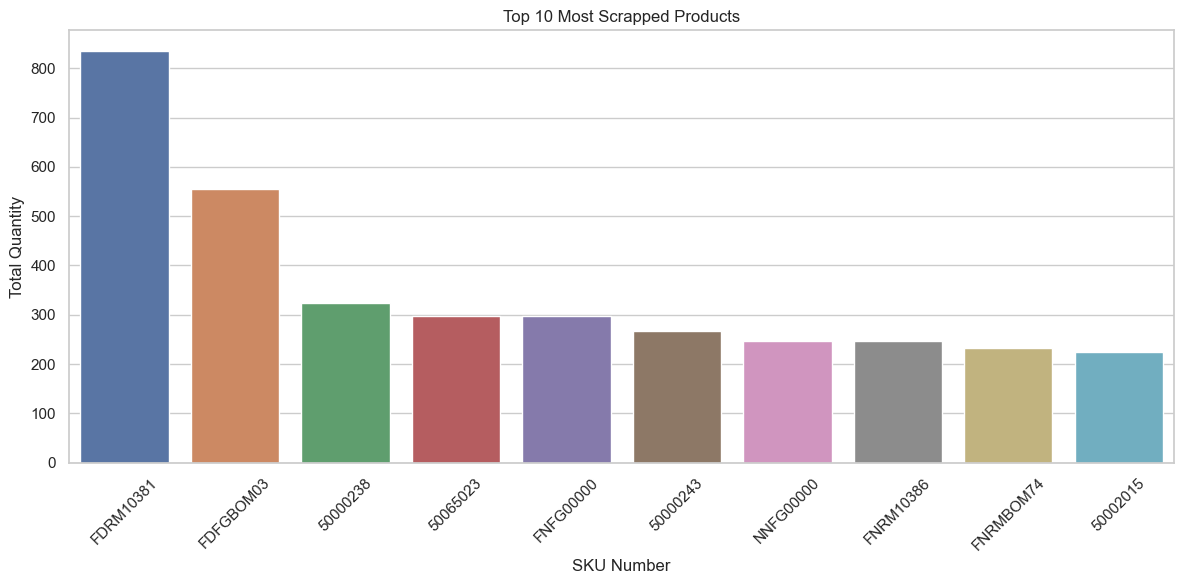

In [100]:
# Top 10 most scrapped products overall
top_10_products = total_quantity_by_sku.nlargest(10, 'transaction_quantity')
print(top_10_products)
# Set up the visualisation style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='sku_number', y='transaction_quantity')
plt.title('Top 10 Most Scrapped Products')
plt.xlabel('SKU Number')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()